In [1]:
%load_ext autoreload
%autoreload 2

import builtins  # Not needed unless saving for github
builtins.use_bokeh_screenshot = True  # Not needed unless saving for github

from kaggle_speech_recog import *

from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# Get feature matrix

In [2]:
X_vector_len = 16000
test = SpeechList.get_test('test/audio')
X_test = test.get_feature_matrix(vector_len=X_vector_len)

# Predict

In [3]:
path2log = 'logs/TestLSTM_trial_graph_trial_run_01.log'  # Specify path to log

In [4]:
log = pickle.load(open(path2log, 'rb'))
GraphClass = globals()[log.graph_name]  # Pick up graph class used to train model
graph = GraphClass(log.g_cnfg)  # Load the same graph configuration
Y_test = graph.predict(X_test, ckp_dir=log.ckp_dir, batch_size=log.t_cnfg.batch_size)  # Use best model in checkpoint directory
test.add_predicted_label(Y_test, le=log.t_cnfg.le)
test.save_submission_csv(dir_='submissions', name=log.joined_name+'.csv')

INFO:tensorflow:Restoring parameters from checkpoints/TestLSTM_trial_graph_trial_run_01/best/model-1350
Predicting starts @ 12/04/2017 00:11:20
15,000 datapoints completed at 12/04/2017 00:16:31
30,000 datapoints completed at 12/04/2017 00:21:42
45,000 datapoints completed at 12/04/2017 00:26:52
60,000 datapoints completed at 12/04/2017 00:32:03
75,000 datapoints completed at 12/04/2017 00:37:14
90,000 datapoints completed at 12/04/2017 00:42:26
105,000 datapoints completed at 12/04/2017 00:47:37
120,000 datapoints completed at 12/04/2017 00:52:49
135,000 datapoints completed at 12/04/2017 00:57:59
150,000 datapoints completed at 12/04/2017 01:03:10
Predicting ends @ 12/04/2017 01:06:08


None, test/audio/clip_c24125cd1.wav, sample rate 16000, data length 16000
prediction: off


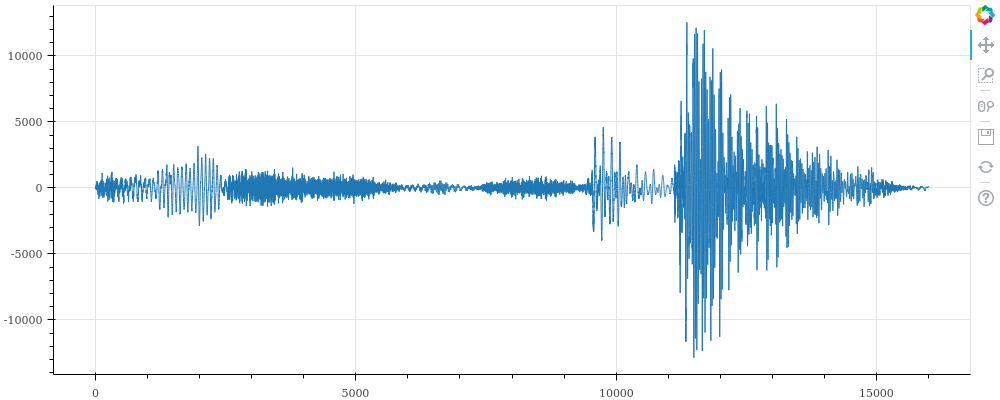

In [5]:
test[0].hear_and_see()